# Loading MNIST data in numpy

In [1]:
##############################################
#
# Author : Prashant Gupta
# Dated  : 25th September 2016
#
##############################################

In [2]:
#Importing Ipython essentials

#To ensure plots are created on the notebook
%matplotlib inline 

Mnist data is set of images of handwritten numbers.

Mnist follows the __idx__ format of data


## Understanding IDX format of data

In the IDX format data is stored as binary stream, with a header. Header describes how to interpret the data. Header has a predefined format.


__Format of the header :__

*Magic Number* <br />
*Size of the i<sup>th</sup> dimesnion* <br />
*.....*<br />
*data*<br />

To give brief overview of the format of the header
<html>
<ol>
    <li> <b>Magic Number :</b> It is a 32 bit integer stored in the big-endian** *(MSB at the lower address) format. <b>First two bytes</b> are always 0. <b>Third byte</b> represents the type of the data (More on it below), and <b>fourth byte</b> represents the number of dimensions. <br /> 
    <small> *This information is necessary, because this will be used to check the type of file, Not a very reliable check though.</small></li>
    <li> <b>Size of dimensions :</b> This information follows the magic number line. Count of lines (represented as '...', in the above block :-P) contatining this information is same as decribed by the fourth byte in the magic number. This value is also stored in 32 bits in the big-endian format. </li>
    <li> <b>Data :</b> Once the header information is completed data block starts and it continues till the end-of-file. Information is represented in the byte format here (So endianess doess't come into picture.). </li>
</ol>
</html>


### Trivia

You can use below <b>C</b> code to check the endianess of your system.
```C
#include <stdio.h>
int main(){
    int x = 1;
    if(*(char *)&amp;x == 1)printf("Little Endian\n");
    else printf("Big Endian\n");
    return 0;
}
```

On intel machine (Which most of you might be using) it should give 'Little Endian'.

### Third byte of the magic number

Third byte of the magic number represents the type of the data. The below map can be used understand the relationship between this number and datatype.

0x08: unsigned byte <br />
0x09: signed byte <br />
0x0B: short (2 bytes) <br />
0x0C: int (4 bytes) <br />
0x0D: float (4 bytes) <br />
0x0E: double (8 bytes) <br />

### Example of IDX format : MNIST dataset

<html>
Mnist data set has 4 files, all in idx format

<ol>
    <li><b>train-images.idx3-ubyte :</b> This file contains the images for training. There are 60000 images in the training file. </li>
    <li><b>train-labels.idx1-ubyte :</b> This file contains the labels for the training dataset.</li>
    <li><b>t10k-images.idx3-ubyte :</b> This file contains the images for testing. There are 10000 images in the testing file.</li>
    <li><b>t10k-labels.idx3-ubyte :</b> This file contains the labels for the testing dataset.</li>
</ol>
<br /><br />
<b>idx3-ubyte</b> in the name of file represents that that this file is in idx format with 3 dimensions and datatype of all the features are unsigned bytes. <br />
<br />
3 dimensions are:
<ol>
    <li>Number of Images: This value will be 60000 for training file and 10000 for testing file. (In 32 bit integer format) </li>
    <li>Number of rows: This value will be 28 (In 32 bit integer format)</li>
    <li>Number of columns: This value will be 28 (In 32 bit integer format) </li>
</ol>
Hence, MNIST training set contains 60000 images of size 28x28 in training set and 10000 images of size 28x28 in testing set.<br />
<br />
Hence, training data file can be seen as
<table>
    <tr>
        <td>offset</td><td>type</td><td>value</td><td>description</td>
    </tr>
    <tr>
        <td>0000</td><td>32 bit integer</td><td>0x00000803(2051)</td><td>magic number (First two byte zero, third 08 representing unsigned byte, fourth byte 3 representing 3 dimensions)</td>
    </tr>
    <tr>
        <td>0004</td><td>32 bit integer</td><td>60000</td><td>number of images</td>
    </tr>
    <tr>
        <td>0008</td><td>32 bit integer</td><td>28<td>number of rows</td>
    </tr>
    <tr>
        <td>0012</td><td>32 bit integer</td><td>28<td>number of columns</td>
    </tr>
    <tr>
        <td>0016</td><td>unsigned byte</td><td>??</td><td>pixel</td>
    </tr>
    <tr>
        <td>0017</td><td>unsigned byte</td><td>??</td><td>pixel</td>
    </tr>
    <tr>
        <td colspan=4>........</td>
    </tr>
    <tr>
        <td>xxxx</td><td>unsigned byte</td><td>??</td><td>pixel</td>
     </tr>
</table>
and testing data file can be seen as,
<table>
    <tr>
        <td>offset</td><td>type</td><td>value</td><td>description</td>
    </tr>
    <tr>
        <td>0000</td><td>32 bit integer</td><td>0x00000803(2051)</td><td>magic number (First two byte zero, third 08 representing unsigned byte, fourth byte 3 representing 3 dimensions)</td>
    </tr>
    <tr>
        <td>0004</td><td>32 bit integer</td><td>10000</td><td>number of images</td>
    </tr>
    <tr>
        <td>0008</td><td>32 bit integer</td><td>28<td>number of rows</td>
    </tr>
    <tr>
        <td>0012</td><td>32 bit integer</td><td>28<td>number of columns</td>
    </tr>
    <tr>
        <td>0016</td><td>unsigned byte</td><td>??</td><td>pixel</td>
    </tr>
    <tr>
        <td>0017</td><td>unsigned byte</td><td>??</td><td>pixel</td>
    </tr>
    <tr>
        <td colspan=4>........</td>
    </tr>
    <tr>
        <td>xxxx</td><td>unsigned byte</td><td>??</td><td>pixel</td>
     </tr>
</table>


<br/>
<b>idx1-ubyte</b> in the name of file represents that that this file is in idx format with 1 dimensions (i.e. labels) and datatype of all the features are unsigned bytes. <br />

Hence, training label file can be seen as

<table>
    <tr>
        <td>offset</td><td>type</td><td>value</td><td>description</td>
    </tr>
    <tr>
        <td>0000</td><td>32 bit integer</td><td>0x00000801(2049)</td><td>magic number (First two byte zero, third 08 representing unsigned byte, fourth byte 1 representing 1 dimensions)</td>
    </tr>
    <tr>
        <td>0004</td><td>32 bit integer</td><td>60000</td><td>number of images</td>
    </tr>
    <tr>
        <td>0008</td><td>unsigned byte</td><td>??</td><td>label</td>
    </tr>
    <tr>
        <td>0009</td><td>unsigned byte</td><td>??</td><td>label</td>
    </tr>
    <tr>
        <td colspan=4>........</td>
    </tr>
    <tr>
        <td>xxxx</td><td>unsigned byte</td><td>??</td><td>label</td>
     </tr>
</table>

and, testing label file can be seen as
<table>
    <tr>
        <td>offset</td><td>type</td><td>value</td><td>description</td>
    </tr>
    <tr>
        <td>0000</td><td>32 bit integer</td><td>0x00000801(2049)</td><td>magic number (First two byte zero, third 08 representing unsigned byte, fourth byte 1 representing 1 dimensions)</td>
    </tr>
    <tr>
        <td>0004</td><td>32 bit integer</td><td>10000</td><td>number of images</td>
    </tr>
    <tr>
        <td>0008</td><td>unsigned byte</td><td>??</td><td>label</td>
    </tr>
    <tr>
        <td>0009</td><td>unsigned byte</td><td>??</td><td>label</td>
    </tr>
    <tr>
        <td colspan=4>........</td>
    </tr>
    <tr>
        <td>xxxx</td><td>unsigned byte</td><td>??</td><td>label</td>
     </tr>
</table>


</html>


Now let's move on to loading these file in the numpy array so that we can use it for further analysis.

In [1]:
###########_Description of dataset_###########
#
# Training Set : 60000 examples
# Test Set : 10000 examples
#
##############################################


#This is a helper script load in the numpy and
#visualize the loaded data
#Libraries needed
# 1. Numpy
# 2. matlplotlib
# 3. pickle
# 4. gzip

#Importing libraries
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
import pickle
import gzip                         #See docs here : https://docs.python.org/2/library/gzip.html

In [2]:
##############################
#                            #
# Class Information:         #
#                            #
# Class to load idx files    #
# Parent class : None        #
# Child class : load_mnist   #
#                            #
##############################

class load_idx:
    
    ###################################################################################################################
    #                                                                                                                 #
    # Class members:                                                                                                  #
    # get_magic_number() : This function returns the magic_number of the idx file, It accepts no value.               #
    #                                                                                                                 #
    # _extract_header()  : This function read all the header and returns the information about datatype and number    #
    #                    : of dimensions present in the idx file. This function is meant to be private to this class, #
    #                    : hence should not be called outside the class. It accepts no value.                         #
    #                                                                                                                 #
    # load_file()        : This function loads the data according to the information provided by the _extract_header  #
    #                    : function, and returns the shaped(According to the dimmension) numpy array.                 #
    #                                                                                                                 #
    ###################################################################################################################
    
    
    ###################################################################################################################
    #                                                                                                                 #
    # Description of Constructor:                                                                                     #
    #                                                                                                                 #
    # file_name     : Name of the file to be read, if this file having some special format, file_handler is also      #
    #               : needs to be specified. For example if the file being opened is in the gunzip format. It's       #
    #               : file handler gzip.GzipFile should be given as the file_handler.                                 #
    #                                                                                                                 #
    # fstream       : This accepts the file descriptor, and act on the previously opened file.                        #
    #                                                                                                                 #
    #       ##########################################################                                                #
    #       #                                                        #                                                #
    #       # file_name and fstream shouldn't be specified together. #                                                #
    #       #                                                        #                                                #
    #       ##########################################################                                                #
    #                                                                                                                 #
    # file_handler  : Method to open the file specified by file_name. it's default value is open function, which is   #
    #               : the core function of the python.                                                                #
    #                                                                                                                 #
    ###################################################################################################################
    
    def __init__(self, file_name=None, fstream=None, file_handler=open):
        self.file_name = file_name
        self.fstream = fstream
        self.file_handler = file_handler
        self.magic_number = 0
        self.header_dtype = np.dtype(np.uint32).newbyteorder('>')            # Defining the header datatype,
                                                                             # '>' specifies big-endian byteorder
                                                                             # so that conversion can be done correctly.
                                                                         
        if not (self.file_name is not None) ^ (self.fstream is not None):    # Condition to check if both input method
                                                                             # are not defined
            raise ValueError('Define either File Name or File Stream')
        elif self.file_name is not None:
            self.fstream = self.file_handler(self.file_name, 'rb')
    
    
    ###################################################################################################################
    #                                                                                                                 #
    # Description of get_magic_number():                                                                              #
    #                                                                                                                 #
    # This function reads the first 4 bytes and convert them into the specified datatype for header.                  #
    #                                                                                                                 #
    ###################################################################################################################
    
    def get_magic_number(self):
        self.magic_number = np.frombuffer(self.fstream.read(4), dtype=self.header_dtype)
        return self.magic_number
    
    ###################################################################################################################
    #                                                                                                                 #
    # Description of _extract_header():                                                                               #
    #                                                                                                                 #
    # This function extracts the information from the magic_number and read the complete header accordingly.          #
    #                                                                                                                 #
    ###################################################################################################################
    
    def _extract_header(self):
        mask_dim = int('0x000000ff',16)                                  # Mask for dimensions. Since the information
                                                                         # about the dimensions is present in the last
                                                                         # (fourth) byte.
        
        mask_datatype = int('0x0000ff00',16)                             # Mask for datatype. Since the information
                                                                         # about the datataype is present in the second
                                                                         # last (third) byte
        
        no_of_dimensions = np.bitwise_and(self.magic_number, np.array(mask_dim, dtype=np.uint32))
                                                                         # Extracting the last byte i.e. Number of
                                                                         # dimenstions. And operation with
                                                                         # the created mask
        
        datatype_index = np.right_shift(np.bitwise_and(self.magic_number, np.array(mask_datatype, dtype=np.uint32)),8)
                                                                         # Extracting the second last byte i.e. datatype
                                                                         # index. And operation with Mask and then right
                                                                         # shift by 1 byte (8 bits).
                    
        # Defining the datatype based on the datatype information gathered from the header.
        if datatype_index == int('0x08',16):
            dt = np.dtype(np.uint8)
        elif datatype_index == int('0x09',16):
            dt = np.dtype(np.int8)
        elif datatype_index == int('0x0B',16):
            dt = np.dtype(np.int16)
        elif datatype_index == int('0x0C',16):
            dt = np.dtype(np.int32)
        elif datatype_index == int('0x0D',16):
            dt = np.dtype(np.float32)
        elif datatype_index == int('0x0E',16):
            dt = np.dtype(np.float64)
        
        dimensions = np.empty(no_of_dimensions, dtype=np.uint32)
        
        
        # Extracting the information about dimensions from the file.
        for i in range(no_of_dimensions):
            read_val = np.frombuffer(self.fstream.read(4),dtype=self.header_dtype)
            dimensions[i] = read_val
        
        return dimensions, dt
    
    ###################################################################################################################
    #                                                                                                                 #
    # Description of load_file():                                                                                     #
    #                                                                                                                 #
    # This function loads the file in the numpy array and convert it into the specified format.                       #
    #                                                                                                                 #
    ###################################################################################################################
    
    def load_file(self):
        if self.magic_number == 0:
            self.get_magic_number()
        [dimensions, dt] = self._extract_header()
        total_bytes_to_be_read = np.prod(dimensions, dtype=np.int32)*dt.itemsize
        data = np.frombuffer(self.fstream.read(total_bytes_to_be_read),dtype=dt)
        data = np.reshape(data,dimensions)
        if self.file_name is not None:
            self.fstream.close()
        return data

In [3]:
##############################
#                            #
# Class Information:         #
#                            #
# Class to load mnist file   #
# Parent class : load_idx    #
# Child class : None         #
#                            #
##############################

class load_mnist(load_idx):
    ###################################################################################################################
    #                                                                                                                 #
    # Class members:                                                                                                  #
    #                                                                                                                 #
    # load()                    : This function loads the specified file in the numpy array. It accepts no argument   # 
    #                                                                                                                 #
    # display_samples(how_many) : This function display some the loaded samples [default value 5], Just for sanity    #
    #                           : check. It accepts one arugment, number of samples to be displayed.                  #
    #                                                                                                                 #
    # display_images(number)    : This function displays specified images in the number variable. Number can be a     #
    #                           : scalar, list or numpy array.                                                        #
    #                                                                                                                 #
    ###################################################################################################################
    
    ###################################################################################################################
    #                                                                                                                 #
    # Description of Constructor:                                                                                     #
    #                                                                                                                 #
    # file_name        : Inherited argument from the load_idx class. For description see there.                       #
    #                                                                                                                 #
    # file_type        : type of the file, Accepted values are ['data', 'label']                                      #
    #                                                                                                                 #
    # file_handler     : Inherited argument from the load_idx class, For description see there.                       #
    #                                                                                                                 #
    # display_sample   : Display some of the values during loading file, Accepted values (True, False)                #
    #                                                                                                                 #
    # convert_to_float : Convert the loaded to the float, Accepted values (True, False)                               #
    #                                                                                                                 #
    ###################################################################################################################
    
    def __init__(self, file_name, file_type, file_handler=open, convert_to_float = False, display_sample = 0):
        load_idx.__init__(self, file_name = file_name, file_handler=file_handler)
        self.file_type = file_type
        self.convert_to_float = convert_to_float
        self.display_sample = display_sample
        self.mnist_magic_number={'data':2051, 'label':2049}
        if self.file_type == 'label':
            self.display_sample = 0
    
    ###################################################################################################################
    #                                                                                                                 #
    # Description of load():                                                                                          #
    #                                                                                                                 #
    # This function checks if the provided file is MNIST. If yes then it loads the data, Internally it calls the      #
    # load_file function from the parent class. If specified, it converts the data into the float format.             #
    #                                                                                                                 #
    # In the float format it nomalizes the data. [range 0 to 1]                                                       #
    #                                                                                                                 #
    ###################################################################################################################
    
    def load(self):
        self.get_magic_number()
        if self.mnist_magic_number[self.file_type] == self.magic_number:
            self.data = self.load_file()
            if self.convert_to_float:
                self.data = self.data.astype(np.float32)
                self.data = np.multiply(self.data, 1.0/255.0)
            if self.display_sample != 0:
                self.display_samples(self.display_sample)
            return self.data
        else:
            print('Given file is not mnist : (%s,%s)'%(self.file_name, self.file_type))
            
    ###################################################################################################################
    #                                                                                                                 #
    # Description of display_samples():                                                                               #
    #                                                                                                                 #
    # Displays the randomly selected images                                                                           #
    #                                                                                                                 #
    ###################################################################################################################
    
    def display_samples(self, how_many=5):
        size = self.data.shape[0]
        perm = np.random.permutation(size)
        perm = perm[:how_many]
        images = self.data[perm,:,:]
        for i in range(how_many):
            fig = plt.figure()
            plt.imshow(images[i], cmap='Greys_r')
        
    ###################################################################################################################
    #                                                                                                                 #
    # Description of display_imagess():                                                                               #
    #                                                                                                                 #
    # Displays the specified selected images                                                                          #
    #                                                                                                                 #
    ###################################################################################################################
    
    def display_images(self, number):
        if number.shape.__len__() > 1:
            print('Number should be 1D array')
        else:
            for i in number:
                fig = plt.figure()
                plt.imshow(self.data[i], cmap='Greys_r')
        

In [4]:
#Test bench


#Path to the mnist data folder

mnist_data_folder = '/home/prashant/Semester_study/TA_Work/ELL784/PCA_Tutorial/mnist_data/'

#Name of training and testing files in gunzip format

training_set_file_name =             'train-images-idx3-ubyte.gz'
training_labels_file_name =          'train-labels-idx1-ubyte.gz'
testing_set_file_name =              't10k-images-idx3-ubyte.gz'
testing_labels_file_name =           't10k-labels-idx1-ubyte.gz'

# If providing data in the gunzip format
test=load_mnist(mnist_data_folder+training_set_file_name, 'data', file_handler=gzip.GzipFile, display_sample=5)
t = test.load()

training_set_file_name_bin =             'train-images.idx3-ubyte'
training_labels_file_name_bin =          'train-labels.idx1-ubyte'
testing_set_file_name_bin =              't10k-images.idx3-ubyte'
testing_labels_file_name_bin =           't10k-labels.idx1-ubyte'

#if providing data in the binary format.
test1=load_mnist(mnist_data_folder+training_set_file_name_bin,'data', convert_to_float=True)
t1 = test1.load()
#test.display_samples()
#test1.display_images(np.array([1,2]))

In [9]:
# Load all the data and save in the pickle file for easy loading.

training_set_file_name =             'train-images-idx3-ubyte.gz'
training_labels_file_name =          'train-labels-idx1-ubyte.gz'
testing_set_file_name =              't10k-images-idx3-ubyte.gz'
testing_labels_file_name =           't10k-labels-idx1-ubyte.gz'

train_images_obj = load_mnist(mnist_data_folder+training_set_file_name, 'data', file_handler=gzip.GzipFile, display_sample=5)
train_labels_obj = load_mnist(mnist_data_folder+training_labels_file_name, 'label', file_handler=gzip.GzipFile)
test_images_obj = load_mnist(mnist_data_folder+testing_set_file_name, 'data', file_handler=gzip.GzipFile, display_sample=5)
test_labels_obj = load_mnist(mnist_data_folder+testing_labels_file_name, 'label', file_handler=gzip.GzipFile)

train_images = train_images_obj.load()
train_labels = train_labels_obj.load()
test_images = test_images_obj.load()
test_labels = test_labels_obj.load()
# Many learning algorithms accepts images in the vector format. Hence converting images in the vector format.

train_images = train_images.reshape(train_images.shape[0],np.prod(train_images.shape[1:]))
test_images = test_images.reshape(test_images.shape[0], np.prod(test_images.shape[1:]))


/home/prashant/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [6]:
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [7]:
def save_pickle(fileName, data):
    with open(fileName+'.pkl', 'w') as fid:
        pickle.dump(data,fid)
    
def load_pickle(fileName):
    with open(fileName, 'r') as fid:
        data = pickle.load(fid)
    return data

In [8]:
#Saving images as pickel

train_data = [train_images, train_labels]
test_data = [test_images, test_labels]

save_pickle('train_images_with_labels_mnist',train_data)
save_pickle('test_images_with_labels_mnist', test_data)


In [11]:
def sanity_check(img, labels):
    length = img.shape[0]
    for i in range(length):
        fig = plt.figure()
        #print(labels[i])
        plt.imshow(img[i],cmap='Greys_r')
        fig.text(.1,.1,labels[i])
        plt.close()

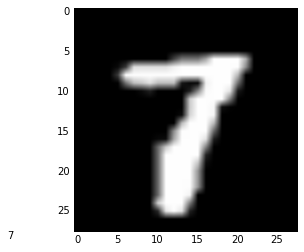

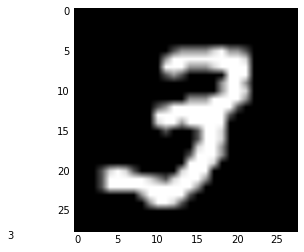

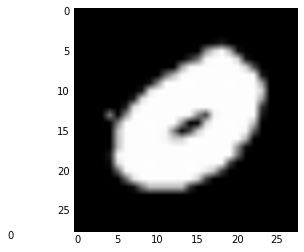

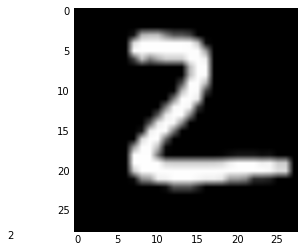

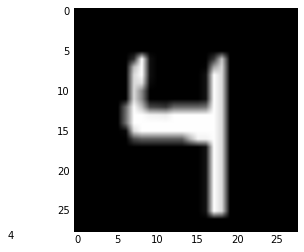

In [12]:
#Loading the training pickle for sanity check

[train_images, train_labels] = load_pickle('train_images_with_labels_mnist.pkl')
#[test_images, test_labels] = load_pickle('test_images_with_labels_mnist.pkl')

no_of_training_images = train_images.shape[0]
perm = np.random.permutation(no_of_training_images)
sample_size = 5
sample=perm[:sample_size]
sample_train_images=train_images[sample]
sample_train_labels=train_labels[sample]
sample_train_images = sample_train_images.reshape(sample_size,28,28)
sanity_check(sample_train_images, sample_train_labels)

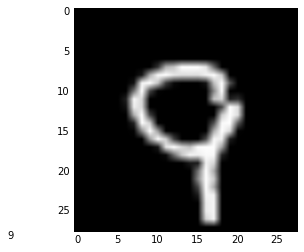

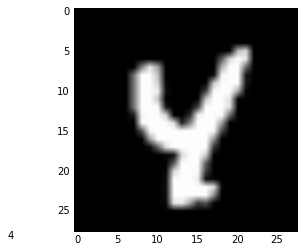

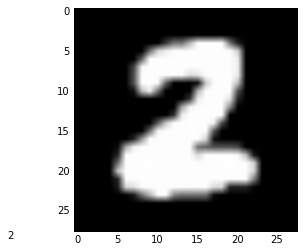

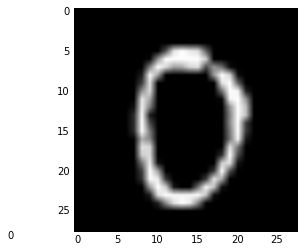

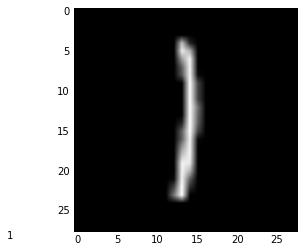

In [13]:
#Loading the testing pickle for sanity check

[test_images, test_labels] = load_pickle('test_images_with_labels_mnist.pkl')

no_of_testing_images = test_images.shape[0]
perm = np.random.permutation(no_of_testing_images)
sample_size = 5
sample=perm[:sample_size]
sample_test_images=test_images[sample]
sample_test_labels=test_labels[sample]
sample_test_images = sample_test_images.reshape(sample_size,28,28)
sanity_check(sample_test_images, sample_test_labels)

If you are running this code outside the <b>Notebook</b> environment

put the above lines like this (Without comments obviously).

In [14]:
#####################################
#if __name__=="__main__":
#    #Path to the mnist data folder
#    mnist_data_folder = '/home/prashant/Semester_study/TA_Work/ELL784/Assignment2/mnist_data'
#    #Name of training and testing files
#
#    training_set_file_name =             'train-images.idx3-ubyte'
#    training_labels_file_name =          'train-labels.idx1-ubyte'
#    testing_set_file_name =              't10k-images.idx3-ubyte'
#    testing_labels_file_name =           't10k-labels.idx3-ubyte'
#    
#    test1=load_mnist(mnist_data_folder+training_set_file_name_bin,'data', convert_to_float=True)
#    t1 = test1.load()